# **Imports**

Taken from : https://www.kaggle.com/datasets/utkarshsaxenadn/weather-classification-resnet152v2

In [1]:
# Common
import keras
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm

# Data
from tensorflow.image import resize
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.utils import load_img, img_to_array

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt

# TL Model
from tensorflow.keras.applications import ResNet50, ResNet50V2, InceptionV3, Xception, ResNet152, ResNet152V2

# Model
from keras import Sequential
from keras.layers import Dense, GlobalAvgPool2D, Dropout
from keras.models import load_model

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model Performance
from sklearn.metrics import classification_report

# Model Viz
from tensorflow.keras.utils import plot_model

# Data and utilities

In [2]:
# Cateories
class_names = {0: 'cloudy', 1: 'foggy', 2: 'rainy', 3: 'shine', 4: 'sunrise'}

In [3]:
def load_image(path):
    '''
    Takes in path of the image and load it
    '''
    img = resize(img_to_array(load_img(path))/255., (256,256))
    return img

In [4]:
def show_image(image, title=None):
    '''
    Takes in an Image and plot it with Matplotlib
    '''
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

In [5]:
def load_data(img_paths):
    X = np.zeros(shape=(len(img_paths), 256,256,3))

    for i, path in tqdm(enumerate(img_paths), desc="Loading"):
        X[i] = load_image(path)
    
    return X

# Load images

In [6]:
image_paths = sorted(glob('../data/*.jpg'))
print(f"Total Number of Images : {len(image_paths)}")

Total Number of Images : 10


In [7]:
image_paths[:5]

['../data/20221028_163125.jpg',
 '../data/pexels-adam-kontor-325117.jpg',
 '../data/pexels-andre-furtado-1162251.jpg',
 '../data/pexels-brett-sayles-1431822.jpg',
 '../data/pexels-brett-sayles-912364.jpg']

In [8]:
images = load_data(image_paths)

Loading: 0it [00:00, ?it/s]2022-10-28 16:50:06.525100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 16:50:06.526119: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
Loading: 10it [00:03,  2.50it/s]


# **Data Viz**

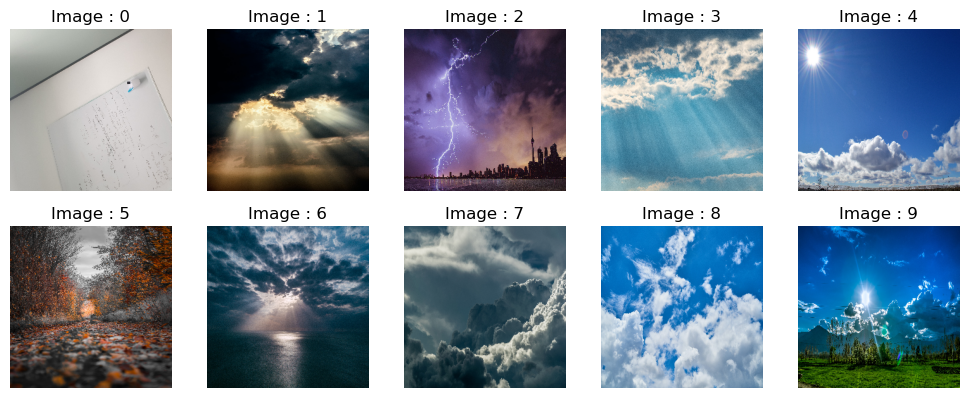

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    
    if i > len(images)-1:
        break
    
    image = images[i]

    plt.subplot(5,5,i+1)
    show_image(image, title=f"Image : {i}")
plt.tight_layout()
plt.show()

# Prediction with pre-trained ResNet152V2 model

In [10]:
# Load model
model_v3 = load_model('../data/ResNet152V2-Weather-Classification-03.h5')

In [11]:
# Make Predictions
preds = np.argmax(model_v3.predict(images), axis=-1)

1/1 [==============================] - 4s 4s/step


# Result

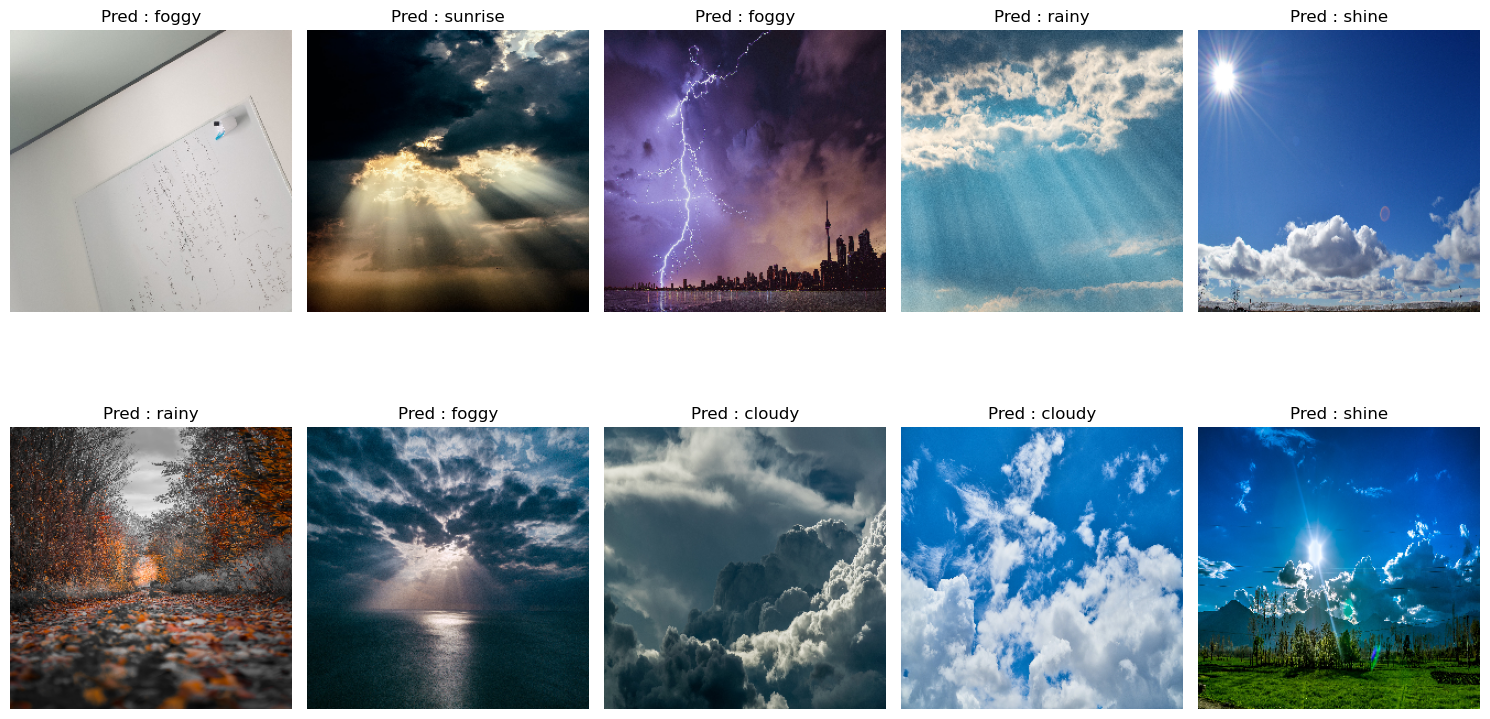

In [12]:
plt.figure(figsize=(15,20))
for i, im in enumerate(images):

    # Make Prediction
    pred = class_names[list(preds)[i]]
    
    # Show Prediction
    plt.subplot(5,5,i+1)
    show_image(im, title=f"Pred : {pred}")
    
    
plt.tight_layout()
plt.show()